<a href="https://colab.research.google.com/github/yashvisatam/RnT_of_MoM_using_NLP/blob/main/RnTofMoM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
!pip install SpeechRecognition
import speech_recognition as sr
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from collections import defaultdict
!pip install summa
import os
from summa.summarizer import summarize
import re

In [ ]:
# !pip uninstall --yes librosa
# !pip install librosa --force-reinstall
!pip install librosa
import librosa

import numpy as np
from sklearn.cluster import KMeans

In [ ]:
import librosa
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!sudo apt install portaudio19-dev
!pip install pyaudio
import pyaudio
!pip install SpeechRecognition
import speech_recognition as sr
!pip install wave
!pip install pydub noisereduce
!pip install soundfile noisereduce

In [ ]:
!pip install SpeechRecognition
import speech_recognition as sr

sound source separation, diarization, speech to text, summarization, counting minutes, live transcription

In [ ]:
# Load audio file
audio_file = "Conference.wav"
y, sr = librosa.load(audio_file)

# Extract features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
delta = librosa.feature.delta(mfcc)
delta2 = librosa.feature.delta(mfcc, order=2)
features = np.vstack([mfcc, delta, delta2]).T

# Perform clustering
n_clusters = 2 # number of speakers
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
labels = kmeans.labels_

# Output speaker segments
segment_labels = [labels[0]]
for i in range(1, len(labels)):
    if labels[i] != labels[i-1]:
        segment_labels.append(labels[i])
segment_starts = np.nonzero(np.diff(segment_labels))[0] + 1
segment_starts = np.concatenate(([0], segment_starts))
segment_ends = np.concatenate((segment_starts[1:], [len(labels)]))

for i, (start, end) in enumerate(zip(segment_starts, segment_ends)):
    speaker = f"Speaker {labels[start]}"
    start_time = librosa.frames_to_time(start)
    end_time = librosa.frames_to_time(end)
    duration = end_time - start_time
    print(f"Segment {i+1}: {speaker} - {start_time:.2f}s - {end_time:.2f}s - {duration:.2f}s")

Segment 1: Speaker 1 - 0.00s - 0.02s - 0.02s
Segment 2: Speaker 1 - 0.02s - 0.05s - 0.02s
Segment 3: Speaker 1 - 0.05s - 0.07s - 0.02s
Segment 4: Speaker 1 - 0.07s - 0.09s - 0.02s
Segment 5: Speaker 1 - 0.09s - 0.12s - 0.02s
Segment 6: Speaker 1 - 0.12s - 0.14s - 0.02s
Segment 7: Speaker 0 - 0.14s - 0.16s - 0.02s
Segment 8: Speaker 0 - 0.16s - 0.19s - 0.02s
Segment 9: Speaker 0 - 0.19s - 0.21s - 0.02s
Segment 10: Speaker 0 - 0.21s - 0.23s - 0.02s
Segment 11: Speaker 0 - 0.23s - 0.26s - 0.02s
Segment 12: Speaker 0 - 0.26s - 0.28s - 0.02s
Segment 13: Speaker 0 - 0.28s - 0.30s - 0.02s
Segment 14: Speaker 0 - 0.30s - 0.33s - 0.02s
Segment 15: Speaker 0 - 0.33s - 0.35s - 0.02s
Segment 16: Speaker 0 - 0.35s - 0.37s - 0.02s
Segment 17: Speaker 1 - 0.37s - 4.92s - 4.55s


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
audio_file = "test.wav"
y, sr = librosa.load(audio_file)

# Extract features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
delta = librosa.feature.delta(mfcc)
delta2 = librosa.feature.delta(mfcc, order=2)
features = np.vstack([mfcc, delta, delta2]).T

# Perform clustering
n_clusters = 3  # number of speakers
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
labels = kmeans.labels_

# Output speaker segments
segment_labels = [labels[0]]
for i in range(1, len(labels)):
    if labels[i] != labels[i - 1]:
        segment_labels.append(labels[i])
segment_starts = np.nonzero(np.diff(segment_labels))[0] + 1
segment_starts = np.concatenate(([0], segment_starts))
segment_ends = np.concatenate((segment_starts[1:], [len(labels)]))

for i, (start, end) in enumerate(zip(segment_starts, segment_ends)):
    speaker = f"Speaker {labels[start]}"
    start_time = librosa.frames_to_time(start)
    end_time = librosa.frames_to_time(end)
    duration = end_time - start_time
    print(f"Segment {i + 1}: {speaker} - {start_time:.2f}s - {end_time:.2f}s - {duration:.2f}s")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Segment 1: Speaker 2 - 0.00s - 0.02s - 0.02s
Segment 2: Speaker 2 - 0.02s - 0.05s - 0.02s
Segment 3: Speaker 2 - 0.05s - 0.07s - 0.02s
Segment 4: Speaker 2 - 0.07s - 0.09s - 0.02s
Segment 5: Speaker 2 - 0.09s - 0.12s - 0.02s
Segment 6: Speaker 2 - 0.12s - 0.14s - 0.02s
Segment 7: Speaker 2 - 0.14s - 0.16s - 0.02s
Segment 8: Speaker 2 - 0.16s - 0.19s - 0.02s
Segment 9: Speaker 2 - 0.19s - 0.21s - 0.02s
Segment 10: Speaker 2 - 0.21s - 0.23s - 0.02s
Segment 11: Speaker 2 - 0.23s - 0.26s - 0.02s
Segment 12: Speaker 2 - 0.26s - 0.28s - 0.02s
Segment 13: Speaker 2 - 0.28s - 0.30s - 0.02s
Segment 14: Speaker 2 - 0.30s - 0.33s - 0.02s
Segment 15: Speaker 0 - 0.33s - 0.35s - 0.02s
Segment 16: Speaker 0 - 0.35s - 0.37s - 0.02s
Segment 17: Speaker 0 - 0.37s - 0.39s - 0.02s
Segment 18: Speaker 0 - 0.39s - 0.42s - 0.02s
Segment 19: Speaker 1 - 0.42s - 0.44s - 0.02s
Segment 20: Speaker 1 - 0.44s - 0.46s - 0.02s
Segment 21: Speaker 1 - 0.46s - 0.49s - 0.02s
Segment 22: Speaker 1 - 0.49s - 0.51s - 0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


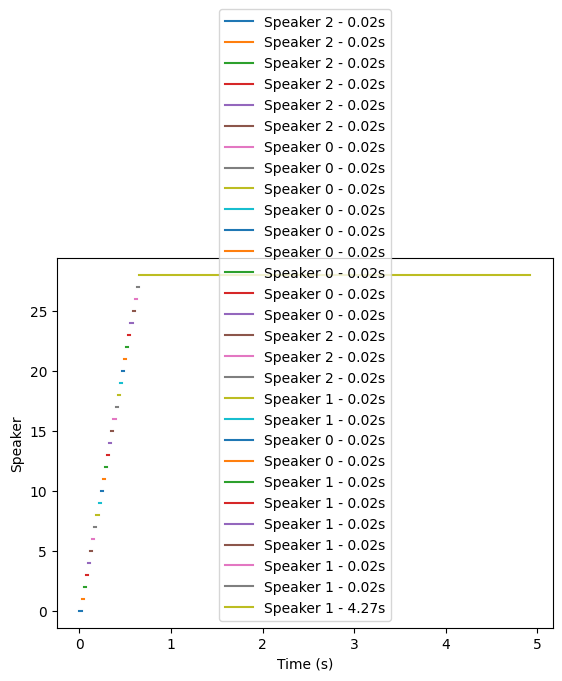

In [ ]:
# Load audio file
audio_file = "Conference.wav"
y, sr = librosa.load(audio_file)

# Extract features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
delta = librosa.feature.delta(mfcc)
delta2 = librosa.feature.delta(mfcc, order=2)
features = np.vstack([mfcc, delta, delta2]).T

# Perform clustering
n_clusters = 3 # number of speakers
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features)
labels = kmeans.labels_

# Output speaker segments
segment_labels = [labels[0]]
for i in range(1, len(labels)):
    if labels[i] != labels[i-1]:
        segment_labels.append(labels[i])
segment_starts = np.nonzero(np.diff(segment_labels))[0] + 1
segment_starts = np.concatenate(([0], segment_starts))
segment_ends = np.concatenate((segment_starts[1:], [len(labels)]))

# Plot speaker segments
# plt.figure(figsize=(8, 3))
for i, (start, end) in enumerate(zip(segment_starts, segment_ends)):
    speaker = labels[start]
    start_time = librosa.frames_to_time(start)
    end_time = librosa.frames_to_time(end)
    duration = end_time - start_time
    plt.plot([start_time, end_time], [i, i], label=f"Speaker {speaker} - {duration:.2f}s")
print()
plt.xlabel("Time (s)")
plt.ylabel("Speaker")
plt.legend()
plt.show()

In [ ]:
!pip install SpeechRecognition
import speech_recognition as sr

In [ ]:
#SPEECH TO TEXT AND TRANSCRIPTION
import os
r = sr.Recognizer()
audio_file = sr.AudioFile("Conference.wav")

# Transcribe speech to text
with audio_file as source:
    audio = r.record(source)
text = r.recognize_google(audio)

# Save transcription to a text file
with open("transcription.txt", "w") as file:
    file.write(text)

# Print the transcription
print("Transcription:\n", text)

Transcription:
 this is Johnny Kenny just wanted to take a minute to thank


In [ ]:
#SUMMARIZATION

# text = "There are times when the night sky glows with bands of color. The bands may begin as cloud shapes and then spread into a great arc across the entire sky. They may fall in folds like a curtain drawn across the heavens. The lights usually grow brighter, then suddenly dim. During this time the sky glows with pale yellow, pink, green, violet, blue, and red. These lights are called the Aurora Borealis. Some people call them the Northern Lights. Scientists have been watching them for hundreds of years. They are not quite sure what causes them. In ancient times people were afraid of the Lights. They imagined that they saw fiery dragons in the sky. Some even concluded that the heavens were on fire."
file1 = open("Conference.txt","r")
text = file1.read()
sentences = sent_tokenize(text)
words = [word.lower() for sentence in sentences for word in word_tokenize(sentence)]

# Filter out stop words and punctuation
stop_words = set(stopwords.words('english') + list(punctuation))
words = [word for word in words if word not in stop_words]

# Build a graph with words as nodes and their co-occurrence as edges
graph = defaultdict(list)
for i in range(len(words)-1):
    for j in range(i+1, len(words)):
        if j != i+1:
            graph[words[i]].append(words[j])
            graph[words[j]].append(words[i])

# Calculate the TextRank scores for each word
d = 0.85  # damping factor for PageRank algorithm
scores = defaultdict(float)
for i in range(10):  # iterate 10 times
    for word in graph:
        score = 1 - d
        for neighbor in graph[word]:
            score += d * (scores[neighbor] / len(graph[neighbor]))
        scores[word] = score

# Sort the words by their TextRank scores in descending order
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Extract the top 5 sentences with highest scores
summary_sentences = []
for sentence in sentences:
    sentence_words = [word.lower() for word in word_tokenize(sentence)]
    sentence_score = sum(scores[word] for word in sentence_words) / len(sentence_words)
    summary_sentences.append((sentence, sentence_score))

summary_sentences = sorted(summary_sentences, key=lambda x: x[1], reverse=True)[:5]

# Print the summary
summary = '\n'.join(sentence for sentence, _ in summary_sentences)
file1.close()
print("Summary:\n", summary)

Summary:
 We just wanted to take a minute to thank.
This is Johnny, Kenny and Josh.
This is Peter.


In [ ]:
#COUNTING MINUTES

# Load paragraph to summarize
# paragraph = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed suscipit sagittis orci, vitae tristique velit dignissim a. Aliquam erat volutpat. Sed eu felis at ex pulvinar porttitor. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nunc commodo vulputate convallis. Cras pellentesque gravida lectus, vel sollicitudin risus vestibulum eu. Nulla sollicitudin, magna eget faucibus dictum, enim urna ultricies odio, at faucibus quam nunc a arcu."
file2 = open("Conference.txt", "r")
paragraph = file2.read()
# Generate summary
summary = summarize(paragraph, ratio=0.9)

# Split summary into bullet points
bullet_points = re.split('\n+', summary)
print("Minutes of meeting :")
# Print bullet points
for point in bullet_points:
    print(f"• {point}")
file2.close()

Minutes of meeting :
• This is Peter.
• We just wanted to take a minute to thank.


In [ ]:
#LIVE TRANSCRIPTION

from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript
import wave

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream

# Save audio as WAV file
def save_audio_as_wav(audio, filename):
    wav_file = wave.open(filename, 'wb')
    wav_file.setnchannels(1)  # Mono audio
    wav_file.setsampwidth(2)  # 2 bytes for 16-bit audio
    wav_file.setframerate(44100)  # Sample rate of 44.1 kHz (standard)
    wav_file.writeframes(audio)
    wav_file.close()

audio = record(15)
save_audio_as_wav(audio, 'output.wav')

import IPython.display as ipd
aud = ipd.Audio(audio)
ipd.display(aud)4

import speech_recognition as sr
import soundfile as sf
import noisereduce as nr
import numpy as np

def preprocess_audio(audio_file_path):
    # Load the audio file
    audio_data, sample_rate = sf.read(audio_file_path)

    if len(audio_data) == 0:
        print("Error: Empty audio data")
        return None, None

    # Apply noise reduction
    reduced_noise = nr.reduce_noise(y=audio_data, sr=sample_rate)

    # Apply audio normalization
    normalized_audio = reduced_noise / np.max(np.abs(reduced_noise))

    return normalized_audio, sample_rate

def transcribe_audio(audio_data, sample_rate):
    # Transcribe the preprocessed audio
    r = sr.Recognizer()
    audio = sr.AudioData(audio_data.tobytes(), sample_rate=sample_rate, sample_width=2)
    try:
        text = r.recognize_google(audio, show_all=True)  # Use `show_all=True` to get alternative transcriptions
        if isinstance(text, dict) and "alternative" in text:
            transcriptions = [alternative["transcript"] for alternative in text["alternative"]]
            print("Transcription alternatives:")
            for transcription in transcriptions:
                print(transcription)
        else:
            transcription = text if isinstance(text, str) else ""
            # print("Transcription:")
            print(transcription)
    except sr.UnknownValueError:
        print("Google Speech Recognition could not understand audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Speech Recognition service; {e}")

# Example usage
audio_file_path = 'output.wav'  # Replace with your recorded audio file path

preprocessed_audio, sample_rate = preprocess_audio(audio_file_path)

if preprocessed_audio is not None and sample_rate is not None:
    transcribe_audio(preprocessed_audio, sample_rate)

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !
